In [4]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pandas as pd
import stanhelper

def df2dict(df):
    return {'x': df.x, 'y': df.y, 'N': df.x.size}

/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
df = pd.read_csv('linear.csv', index_col=0)

In [6]:
model_code="""
data {
int N;
vector[N] x;
vector[N] y;
}
parameters {
real m;
real b;
real<lower=0> sigma;
}
model {
sigma ~ exponential(5);
m ~ normal(0, 10);
b ~ normal(0, 5);

y ~ normal(m * x + b, sigma);
}"""

In [7]:
sm = pystan.StanModel(model_code=model_code)

In [8]:
out = sm.sampling(data=df2dict(df), chains=4, iter=10000)

/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/Users/ryandwyer/anaconda/envs/py27/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an 

In [9]:
out

Inference for Stan model: anon_model_8e623bb5a99c883e87c9e5f5ad03c107.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
m       2.31  1.3e-3   0.18   1.94   2.19   2.31   2.43   2.67  20000    1.0
b       0.61  7.6e-3   1.07  -1.47  -0.09    0.6   1.32   2.72  20000    1.0
sigma   2.23  2.2e-3    0.3   1.73   2.02    2.2   2.41   2.91  20000    1.0
lp__  -34.88  9.0e-3   1.27  -38.2 -35.45 -34.55 -33.95 -33.44  20000    1.0

Samples were drawn using NUTS(diag_e) at Tue Feb 16 10:45:19 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

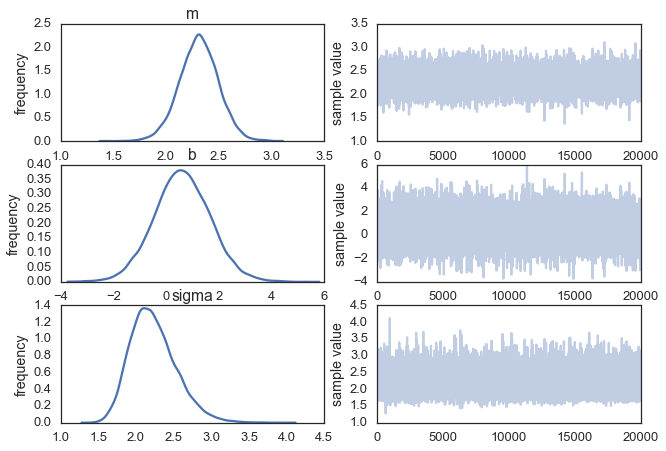

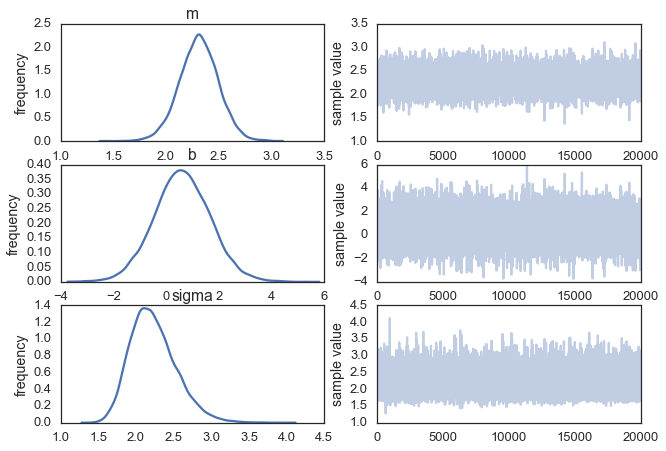

In [10]:
out.traceplot()

In [11]:
samples = out.extract()

In [12]:
samples

OrderedDict([(u'm',
              array([ 2.45024527,  2.49832896,  1.93333629, ...,  2.3029247 ,
                      2.48685012,  2.34364488])),
             (u'b',
              array([ 0.03392973, -1.24967423,  2.52031551, ...,  0.51082119,
                     -0.41660216,  0.95086556])),
             (u'sigma',
              array([ 2.22018768,  2.66372259,  2.34716597, ...,  2.10843767,
                      2.50977843,  1.82715954])),
             (u'lp__',
              array([-33.69186514, -36.08650242, -35.61169616, ..., -33.36447976,
                     -34.53059585, -34.56892462]))])

In [16]:
mu = np.zeros((samples['m'].size, df.x.size))
for i in xrange(samples['m'].size):
    mu[i] = samples['m'][i]*df.x + samples['b'][i]
mu_p = lambda p: np.percentile(mu, p, axis=0)
mb = np.polyfit(df.x, df.y, 1)

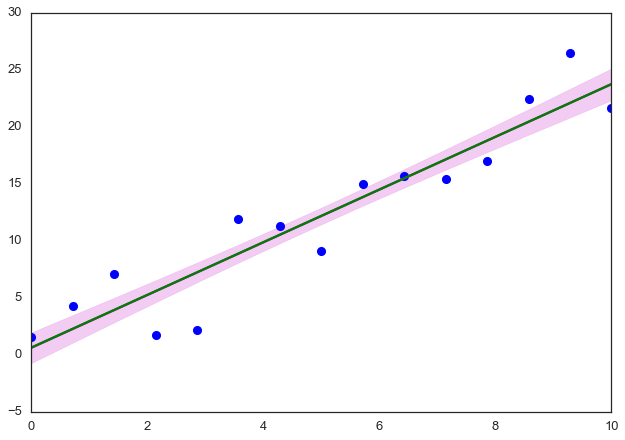

In [17]:
plt.plot(df.x, df.y, 'bo', markeredgewidth=0)
plt.plot(df.x, mu_p(50), 'm')
plt.plot(df.x, np.polyval(mb, df.x), 'g-')
plt.fill_between(df.x, mu_p(10), mu_p(90), color='m', alpha=0.2, zorder=0)

(<matplotlib.figure.Figure at 0x11f1dc210>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fd3b450>)

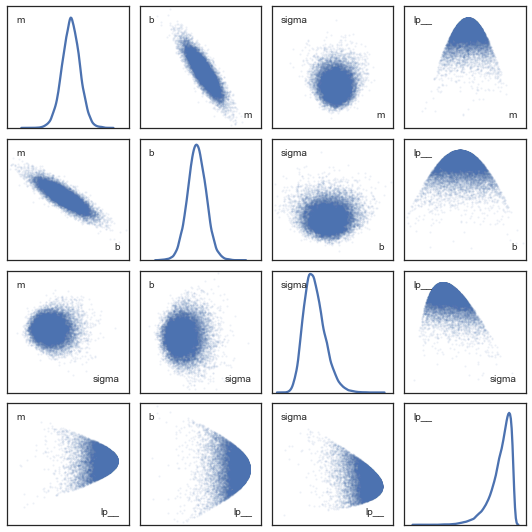

In [18]:
stanhelper.plot_all_traces(samples)